<a href="https://colab.research.google.com/github/siddhantbhattarai/AI-Pre-Foundation/blob/main/Day_4_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create a DataFrame from a dictionary
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [19, 20, 21, 18],
    'Citi':['New York', 'Paris', 'London', 'Sydney']
}
df = pd.DataFrame(data)
print(df)

    Name  Age      Citi
0   John   19  New York
1   Anna   20     Paris
2  Peter   21    London
3  Linda   18    Sydney


In [3]:
# Load the datasets
url = 'https://raw.githubusercontent.com/siddhantbhattarai/AI-Pre-Foundation/main/sample_data.csv'
sample_df = pd.read_csv(url)

In [8]:
sample_df.head()

,id,date,category,value,price
0,1,2023-01-01,D,NaN,20.924374
1,2,2023-01-02,d,15.285914,19.116564
2,3,2023-01-03,C,24.595773,31.802288
3,4,2023-01-04,d,16.068137,17.372052
4,5,2023-01-05,d,18.656702,22.958682


In [6]:
sample_df.tail()

,id,date,category,value,price
995,996,2025-09-22,E,44.720254,40.902244
996,997,2025-09-23,d,60.059433,47.916017
997,998,2025-09-24,A,51.567943,32.767233
998,999,2025-09-25,A,91.939197,20.960906
999,1000,2025-09-26,d,49.696348,495.710306


In [9]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1000 non-null   int64  
 1   date      1000 non-null   object 
 2   category  951 non-null    object 
 3   value     950 non-null    float64
 4   price     1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


In [10]:
sample_df.shape

(1000, 5)

In [11]:
sample_df.describe()

,id,value,price
count,1000.000000,950.000000,1000.000000
mean,500.500000,49.952027,27.713727
std,288.819436,29.113752,48.524214
min,1.000000,0.463202,4.438178
25%,250.750000,23.754353,14.818521
50%,500.500000,50.656174,20.281134
75%,750.250000,74.383678,28.620361
max,1000.000000,99.941373,495.710306


In [12]:
sample_df['date'].dtype

dtype('O')

Exercise 1: Simple Data Type Conversion

In [13]:
sample_df['date'] = pd.to_datetime(sample_df['date'])
print(sample_df['date'].dtype)

datetime64[ns]


Exercise 2: Checking for data impurities

In [14]:
sample_df.isnull().sum()

id           0
date         0
category    49
value       50
price        0
dtype: int64

In [15]:
cleaned_sample_df = sample_df.dropna()
cleaned_sample_df.isnull().sum()

id          0
date        0
category    0
value       0
price       0
dtype: int64

In [17]:
cleaned_sample_df.duplicated().sum()
# cleaned_sample_df.drop_duplicates()

0

In [18]:
# Basic string cleaning
cleaned_sample_df['category'] = cleaned_sample_df['category'].str.strip().str.lower()
print(cleaned_sample_df['category'].value_counts())

category
d    319
a    159
e    144
b    143
c    137
Name: count, dtype: int64


<ipython-input-18-509e055ae241>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sample_df['category'] = cleaned_sample_df['category'].str.strip().str.lower()


In [19]:
#Simple outlier detections
Q1 = cleaned_sample_df['price'].quantile(0.25)
Q3 = cleaned_sample_df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = cleaned_sample_df[(cleaned_sample_df['price'] < lower_bound) | (cleaned_sample_df['price'] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 41


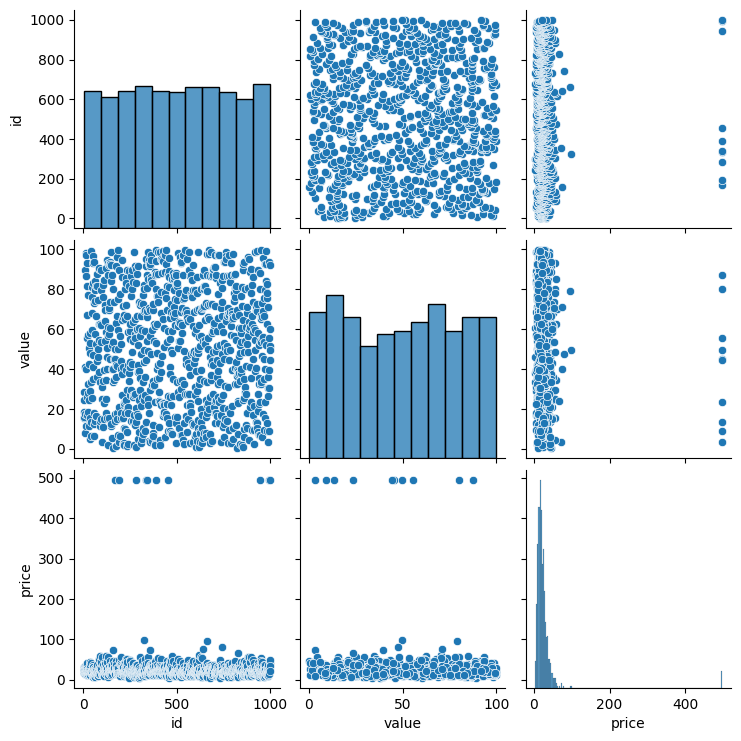

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(cleaned_sample_df)
plt.show()